In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [2]:
df = pd.read_csv("SBI.csv")
df

,Date,Close,Open
0,03-01-2017,240.484817,239.601049
1,04-01-2017,238.520874,241.368600
2,05-01-2017,240.926712,240.583016
3,06-01-2017,241.466782,241.564985
4,09-01-2017,242.596054,241.957764
...,...,...,...
1090,08-06-2021,427.200012,432.250000
1091,09-06-2021,421.450012,427.500000
1092,10-06-2021,432.250000,424.899994
1093,11-06-2021,429.600006,434.850006


In [3]:
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [4]:
df

,Date,Close,Open
0,2017-01-03,240.484817,239.601049
1,2017-01-04,238.520874,241.368600
2,2017-01-05,240.926712,240.583016
3,2017-01-06,241.466782,241.564985
4,2017-01-09,242.596054,241.957764
...,...,...,...
1090,2021-06-08,427.200012,432.250000
1091,2021-06-09,421.450012,427.500000
1092,2021-06-10,432.250000,424.899994
1093,2021-06-11,429.600006,434.850006


In [5]:
data = df.drop(['Date'], axis=1)
data.index = df.Date

In [6]:
data

,Close,Open
Date,,
2017-01-03,240.484817,239.601049
2017-01-04,238.520874,241.368600
2017-01-05,240.926712,240.583016
2017-01-06,241.466782,241.564985
2017-01-09,242.596054,241.957764
...,...,...
2021-06-08,427.200012,432.250000
2021-06-09,421.450012,427.500000
2021-06-10,432.250000,424.899994


In [7]:
train_df = data.iloc[:int(df.shape[0]*0.9595), :]
valid_df = data.iloc[int(df.shape[0]*0.9595):, :]

In [8]:
train_df.shape, valid_df.shape

((1050, 2), (45, 2))

In [9]:
df.shape

(1095, 3)

### Auto Regressive (AR) model

In [10]:
train_df

,Close,Open
Date,,
2017-01-03,240.484817,239.601049
2017-01-04,238.520874,241.368600
2017-01-05,240.926712,240.583016
2017-01-06,241.466782,241.564985
2017-01-09,242.596054,241.957764
...,...,...
2021-03-31,360.967346,357.003939
2021-04-01,367.259277,364.336282
2021-04-05,350.315704,364.138102


In [11]:
len(valid_df), len(train_df)

(45, 1050)

In [12]:
len(valid_df), len(train_df)

(45, 1050)

In [13]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_df['Close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    354.767843
1051    354.269561
1052    353.775082
1053    353.284379
1054    352.797421
1055    352.314180
1056    351.834628
1057    351.358738
1058    350.886479
1059    350.417826
1060    349.952751
1061    349.491226
1062    349.033224
1063    348.578718
1064    348.127682
1065    347.680089
1066    347.235912
1067    346.795127
1068    346.357706
1069    345.923624
1070    345.492856
1071    345.065376
1072    344.641160
1073    344.220182
1074    343.802418
1075    343.387842
1076    342.976432
1077    342.568162
1078    342.163008
1079    341.760948
1080    341.361957
1081    340.966011
1082    340.573088
1083    340.183165
1084    339.796218
1085    339.412225
1086    339.031163
1087    338.653010
1088    338.277744
1089    337.905342
1090    337.535783
1091    337.169046
1092    336.805108
1093    336.443948
1094    336.085545
dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:147: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Int64Indexes with a u

In [14]:
yhat.index = valid_df.index

In [15]:
mse(yhat, valid_df['Close'])

2950.235057464782

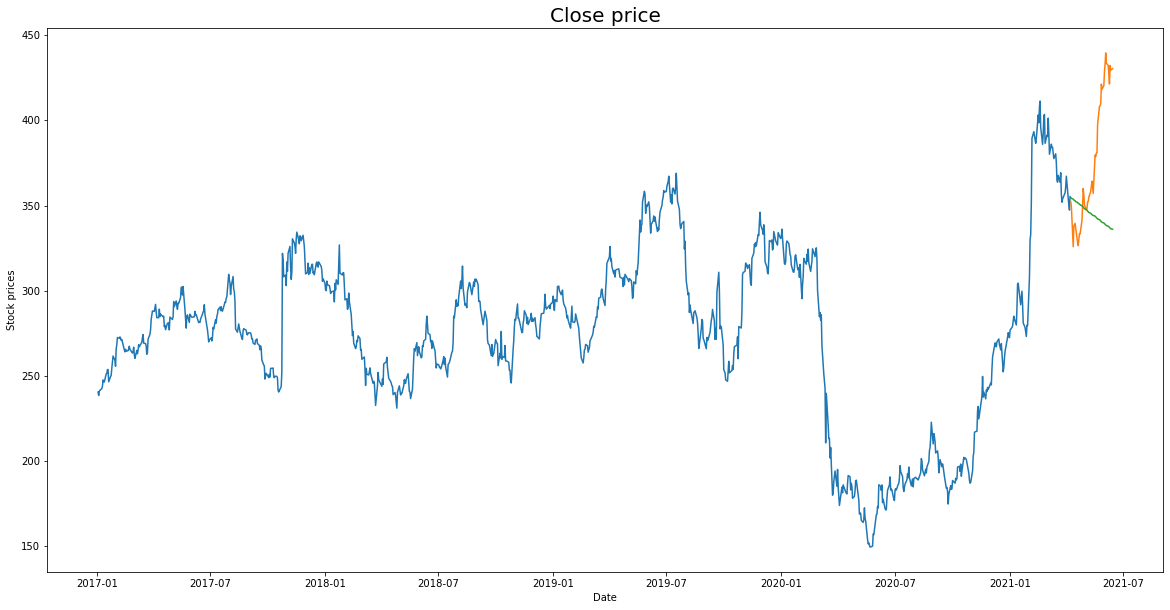

In [16]:
plt.figure(figsize=(20,10))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
#plt.legend()
plt.show()

### Moving Average (MA)

In [17]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(0,1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

1050    307.215390
1051    275.253892
1052    275.253892
1053    275.253892
1054    275.253892
1055    275.253892
1056    275.253892
1057    275.253892
1058    275.253892
1059    275.253892
1060    275.253892
1061    275.253892
1062    275.253892
1063    275.253892
1064    275.253892
1065    275.253892
1066    275.253892
1067    275.253892
1068    275.253892
1069    275.253892
1070    275.253892
1071    275.253892
1072    275.253892
1073    275.253892
1074    275.253892
1075    275.253892
1076    275.253892
1077    275.253892
1078    275.253892
1079    275.253892
1080    275.253892
1081    275.253892
1082    275.253892
1083    275.253892
1084    275.253892
1085    275.253892
1086    275.253892
1087    275.253892
1088    275.253892
1089    275.253892
1090    275.253892
1091    275.253892
1092    275.253892
1093    275.253892
1094    275.253892
dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

In [18]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

11970.615940341082

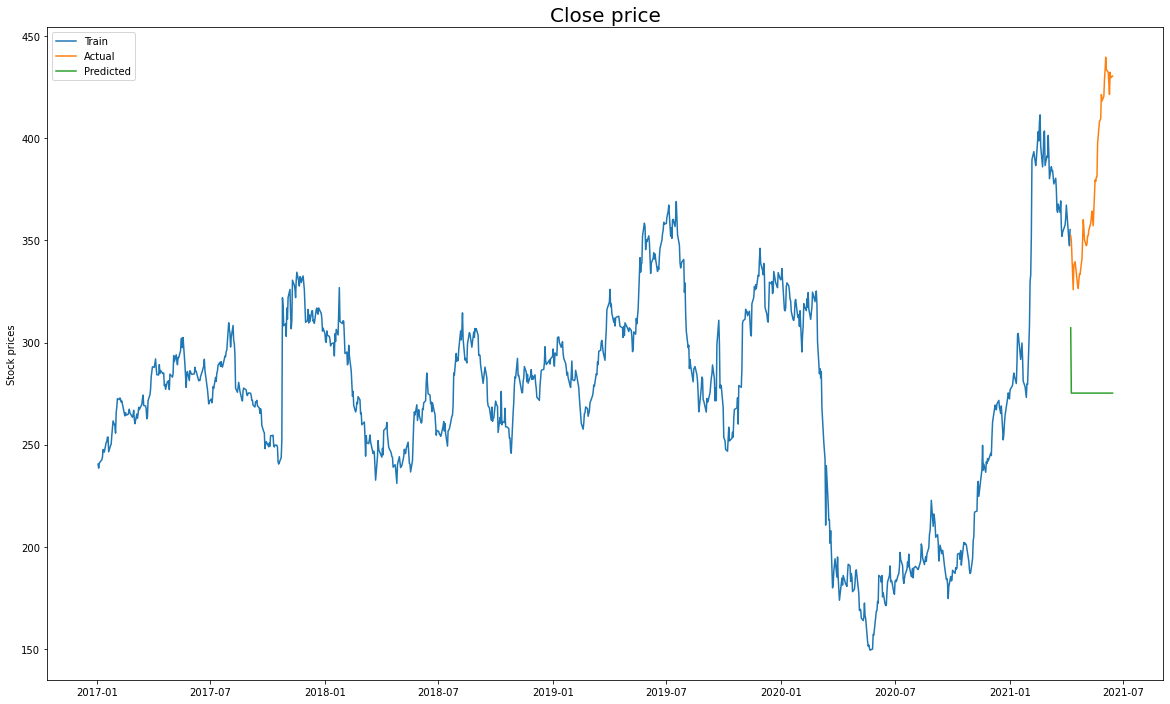

In [19]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Autoregressive Moving Average (ARMA)

### ARMA(1,2)

In [20]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

3333.413798510269

### ARMA(2,1)

In [21]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

1050    355.392730
1051    355.498821
1052    355.588340
1053    355.661395
1054    355.718096
1055    355.758558
1056    355.782897
1057    355.791231
1058    355.783681
1059    355.760371
1060    355.721426
1061    355.666973
1062    355.597142
1063    355.512065
1064    355.411876
1065    355.296712
1066    355.166709
1067    355.022009
1068    354.862752
1069    354.689083
1070    354.501147
1071    354.299092
1072    354.083066
1073    353.853220
1074    353.609707
1075    353.352681
1076    353.082298
1077    352.798713
1078    352.502086
1079    352.192577
1080    351.870348
1081    351.535560
1082    351.188378
1083    350.828967
1084    350.457494
1085    350.074126
1086    349.679033
1087    349.272383
1088    348.854347
1089    348.425099
1090    347.984810
1091    347.533654
1092    347.071805
1093    346.599441
1094    346.116735
dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [22]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

2280.2575162928188

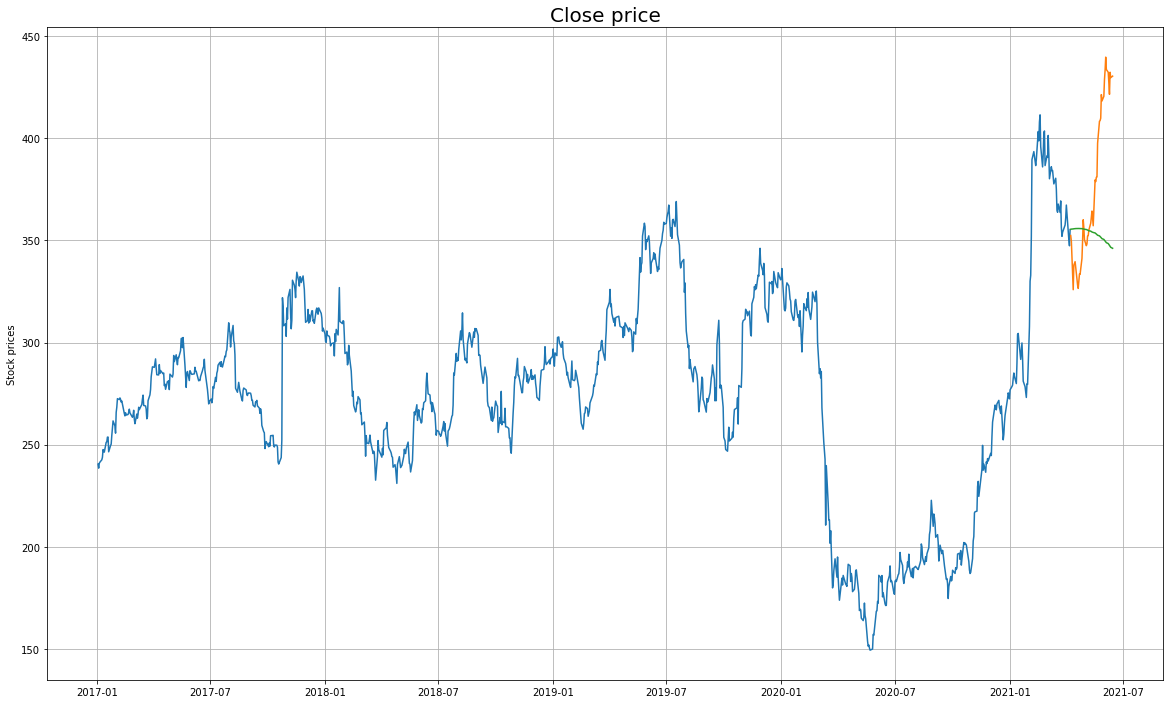

In [23]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.grid()

### ARMA(2,2)

In [24]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(2, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

3321.9105779197553

### ARMA(3,1)

In [25]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(3, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

3327.795275319375

### ARMA(3,2)

In [26]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(3, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

2962.315814703651

### ARMA(3,3)

In [27]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(3, 3))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

3000.0872061289374

In [28]:
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train_df['Close'], order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

3258.4582234113095

### Autoregressive Integrated Moving Average (ARIMA)

### ARIMA(1,1,1)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

1049    355.213577
1050    355.175215
1051    355.152911
1052    355.144916
1053    355.149672
1054    355.165791
1055    355.192035
1056    355.227301
1057    355.270608
1058    355.321079
1059    355.377935
1060    355.440480
1061    355.508095
1062    355.580228
1063    355.656386
1064    355.736131
1065    355.819073
1066    355.904864
1067    355.993193
1068    356.083785
1069    356.176392
1070    356.270795
1071    356.366798
1072    356.464228
1073    356.562929
1074    356.662763
1075    356.763605
1076    356.865348
1077    356.967891
1078    357.071149
1079    357.175043
1080    357.279504
1081    357.384471
1082    357.489887
1083    357.595706
1084    357.701881
1085    357.808375
1086    357.915154
1087    358.022185
1088    358.129442
1089    358.236899
1090    358.344536
1091    358.452332
1092    358.560271
1093    358.668336
dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be gi

In [30]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1808.1393025342984

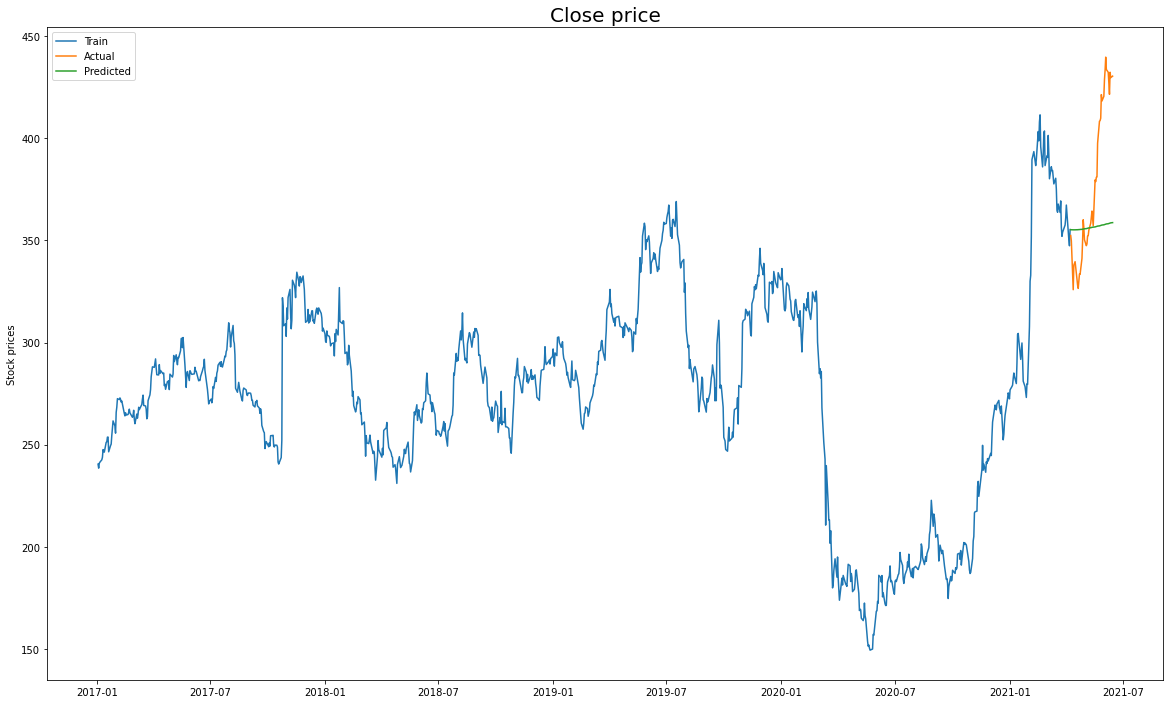

In [31]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,1)

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

1049    355.506422
1050    355.815178
1051    355.899560
1052    356.018448
1053    356.126098
1054    356.236335
1055    356.345885
1056    356.455606
1057    356.565283
1058    356.674972
1059    356.784658
1060    356.894344
1061    357.004030
1062    357.113717
1063    357.223403
1064    357.333089
1065    357.442775
1066    357.552462
1067    357.662148
1068    357.771834
1069    357.881520
1070    357.991207
1071    358.100893
1072    358.210579
1073    358.320265
1074    358.429952
1075    358.539638
1076    358.649324
1077    358.759010
1078    358.868697
1079    358.978383
1080    359.088069
1081    359.197755
1082    359.307442
1083    359.417128
1084    359.526814
1085    359.636500
1086    359.746187
1087    359.855873
1088    359.965559
1089    360.075246
1090    360.184932
1091    360.294618
1092    360.404304
1093    360.513991
dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

In [33]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1724.0264043487468

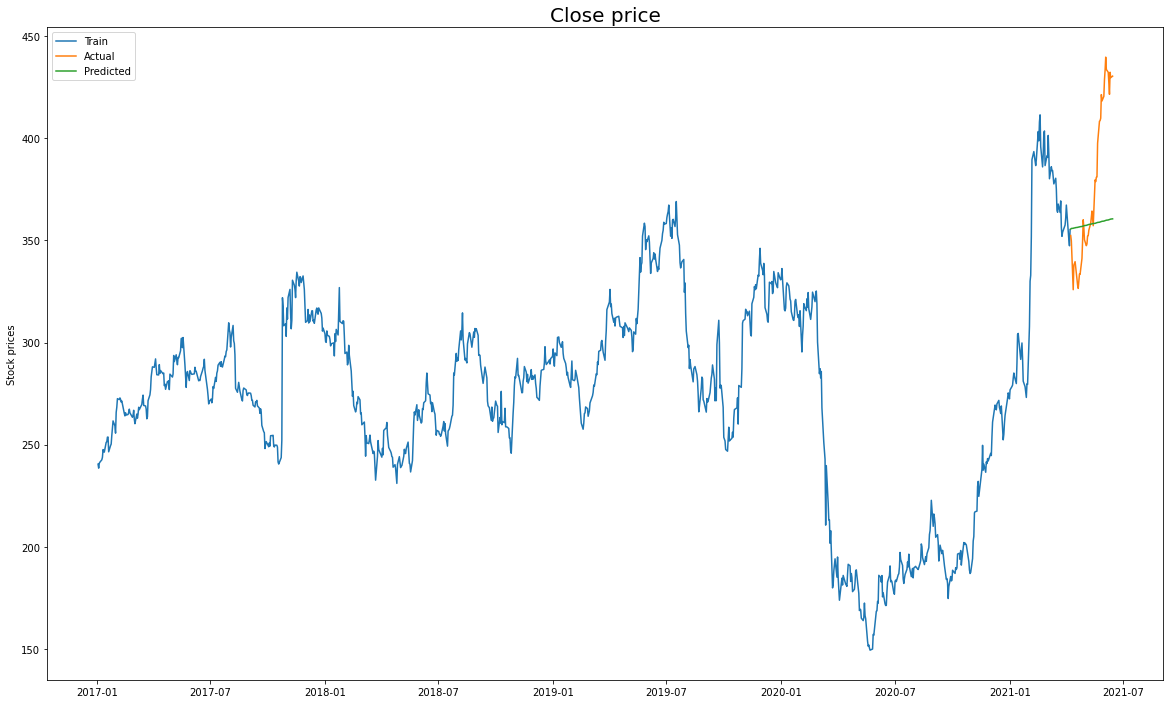

In [34]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,2)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

1728.6331711116109

### ARIMA(3,1,1)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

1719.7219144262688

### ARIMA(3,1,2)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 2))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

1711.0232840227309

### ARIMA(3,1,3)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 3))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequ

1804.3184203448625

In [39]:
from pmdarima.arima import auto_arima

model_auto = auto_arima(train_df['Close'],exog=train_df['Open'],
                        m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1050
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 5)   Log Likelihood               -3449.149
Date:                           Tue, 24 Aug 2021   AIC                           6902.299
Time:                                   18:28:55   BIC                           6912.210
Sample:                                        0   HQIC                          6906.057
                                          - 1050                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5        0.1141      0.029      3.925      0.000       0.057       0.171
sigma2        42.0194      0.621     67.681      0.000      40.803      43.236
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):             10719.15
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1050    355.544880
1051    355.718945
1052    358.053283
1053    357.655528
1054    357.736375
1055    357.454347
1056    357.453734
1057    358.029782
1058    358.309621
1059    355.866655
1060    354.666003
1061    355.517982
1062    355.468770
1063    356.067878
1064    358.110593
1065    358.887072
1066    359.422022
1067    358.939501
1068    358.614233
1069    358.927537
1070    358.650488
1071    357.574843
1072    356.545871
1073    356.738386
1074    356.662648
1075    357.304970
1076    359.323141
1077    360.212241
1078    360.791864
1079    360.292272
1080    359.938021
1081    360.227931
1082    359.899693
1083    358.953304
1084    357.941229
1085    358.072515
1086    357.994856
1087    358.641717
1088    360.657998
1089    361.558019
1090    362.142134
1091    361.641195
1092    361.284441
1093    361.572340
1094    361.239455
Name: predicted_mean, dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [41]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1716.6332275236646

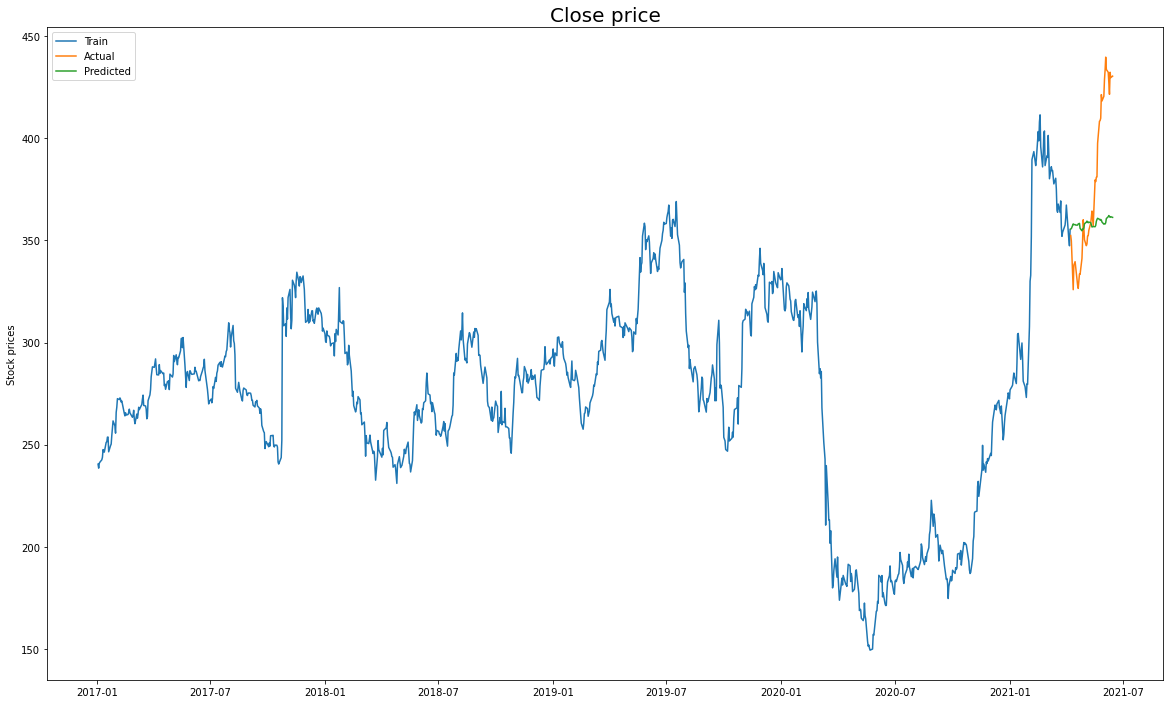

In [42]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], exog=train_df['Open'], order=(1, 1, 1), seasonal_order=(1,1,1,4))
model_fit = model.fit(disp=False)
# make prediction

yhat = model_fit.predict(1050, 1094, exog = valid_df['Open'])
print(yhat)

C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


1050    356.503975
1051    349.346555
1052    339.014194
1053    328.926259
1054    338.130431
1055    338.380840
1056    322.532610
1057    331.820533
1058    322.325459
1059    327.240592
1060    334.413676
1061    340.555377
1062    352.762474
1063    359.984999
1064    348.355438
1065    346.053043
1066    350.798035
1067    351.638473
1068    352.822161
1069    353.809023
1070    356.197539
1071    351.981410
1072    357.534367
1073    366.081544
1074    360.026101
1075    384.529349
1076    376.385381
1077    382.772462
1078    385.161005
1079    411.038858
1080    408.884226
1081    409.085593
1082    408.430369
1083    424.293275
1084    414.676486
1085    421.112650
1086    425.219444
1087    434.636068
1088    434.842430
1089    433.941996
1090    430.560814
1091    425.221564
1092    422.356051
1093    433.693550
1094    425.357742
Name: predicted_mean, dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [44]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

46.29425640106973

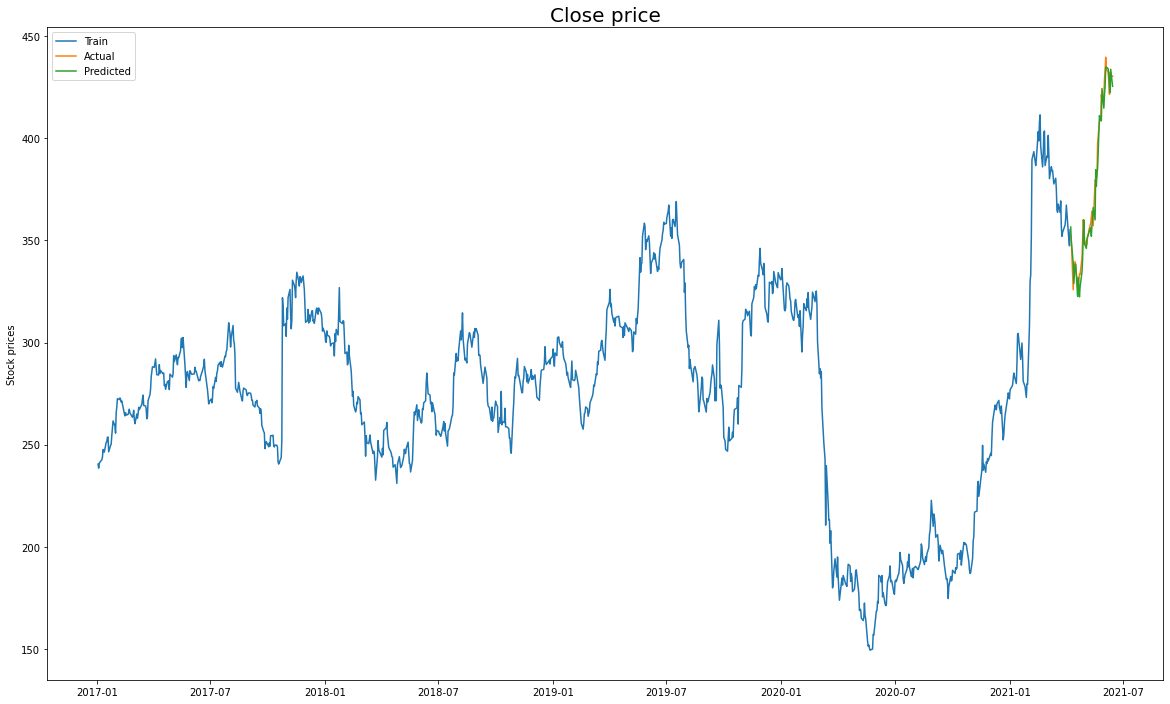

In [45]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Simple Exponential Smoothing (SES)

In [46]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Close'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    355.269958
1051    355.269958
1052    355.269958
1053    355.269958
1054    355.269958
1055    355.269958
1056    355.269958
1057    355.269958
1058    355.269958
1059    355.269958
1060    355.269958
1061    355.269958
1062    355.269958
1063    355.269958
1064    355.269958
1065    355.269958
1066    355.269958
1067    355.269958
1068    355.269958
1069    355.269958
1070    355.269958
1071    355.269958
1072    355.269958
1073    355.269958
1074    355.269958
1075    355.269958
1076    355.269958
1077    355.269958
1078    355.269958
1079    355.269958
1080    355.269958
1081    355.269958
1082    355.269958
1083    355.269958
1084    355.269958
1085    355.269958
1086    355.269958
1087    355.269958
1088    355.269958
1089    355.269958
1090    355.269958
1091    355.269958
1092    355.269958
1093    355.269958
1094    355.269958
dtype: float64


C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Jaydeep\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [47]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1946.057125175247

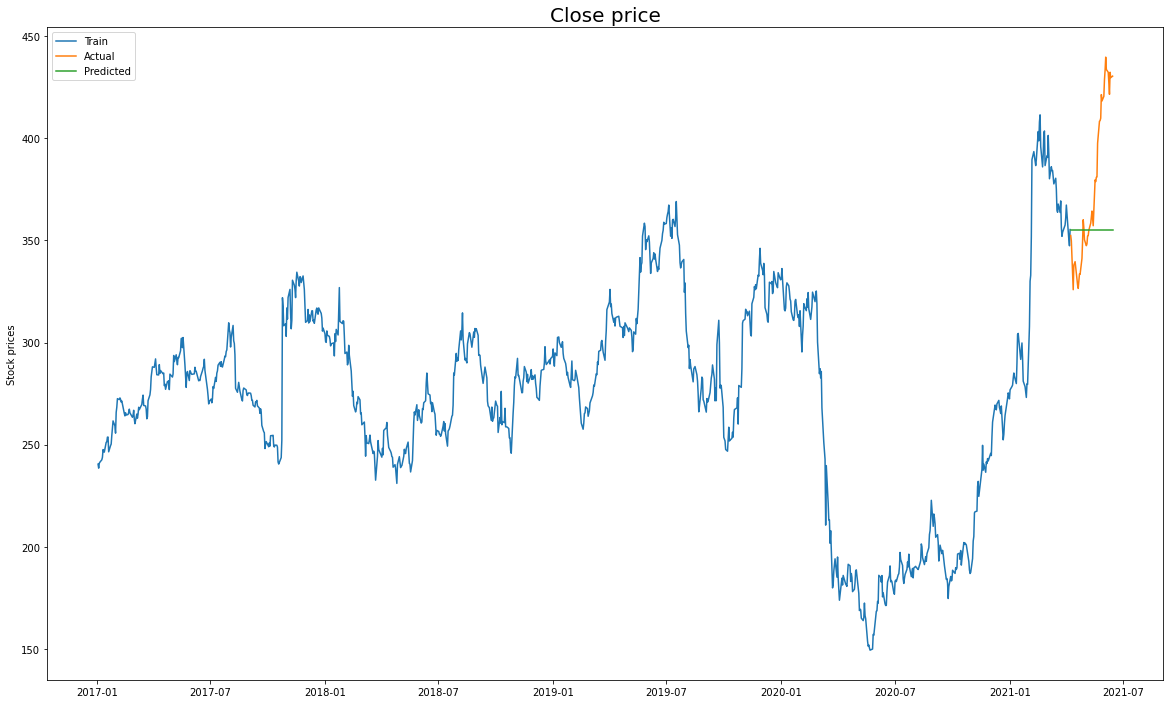

In [48]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()